## Assignment 9

In this assignment, **pretrained neural networks** trained on IMAGENET are used.  
The goal is to correctly identify the breed of a pictured dog.  
A dog is considered to be identified correctly if its actual breed is amongst the top5 predictions of the classifier.  
Disclaimer: They are all good boys!

### Introduction 

Classification neural networks are supervised machine learning algorithms.  
A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Many such models are available for free to be used for transfer learning.
 
Here, three such models are used:
* ResNet50
* Inception ResNet V2
* NASNet (Large)

In [1]:
# !pip install opencv-python
# !pip install tensorflow

In [2]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.applications.inception_resnet_v2 import decode_predictions
import glob
import cv2
import matplotlib.pyplot as plt

In [3]:
# load all the images and the names of the good boys
images = [cv2.imread(file) for file in glob.iglob('**/*.jpg', recursive=True)]
dognames = [dogname.split('\\')[1] for dogname in glob.glob('**/*.jpg', recursive=True)]

In [4]:
# preprocess the images according to the input layer of each network
def process_img(image: np.ndarray, network_name: str) -> np.ndarray:
    if network_name == 'ResNet50':
        im_resized_scaled = cv2.resize(image, (224, 224))/255
    elif network_name == 'InceptionResNetV2':
        im_resized_scaled = cv2.resize(image, (299, 299))/255
    elif network_name == 'NASNetLarge':
        im_resized_scaled = cv2.resize(image, (331, 331))/255
    else:
        raise ValueError('Network should be one of "ResNet50", "InceptionResNetV2", "NASNetLarge"')
    
    im = im_resized_scaled[np.newaxis, ...]
    return im

In [5]:
# get the correct model according to its name 
def get_model(network_name: str) -> tf.python.keras.engine.functional.Functional:
    if network_name == 'ResNet50':
        model = tf.keras.applications.resnet50.ResNet50()
    elif network_name == 'InceptionResNetV2':
        model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2()
    elif network_name == 'NASNetLarge':
        model = tf.keras.applications.NASNetLarge()
    else:
        raise ValueError('Network should be one of "ResNet50", "InceptionResNetV2", "NASNetLarge"')

    return model

In [6]:
def plot_dogs_and_preds(dog_images, breed_predictions, dog_name) -> None:

    num_subplots = len(dog_images)

    plt.figure(figsize=(14,4))
    plt.suptitle(f'That good boy {dog_name}')
    for n in range(1, num_subplots+1):
        # print the dog
        plt.subplot(2, num_subplots, n)
        plt.imshow(dog_images[n-1])
        plt.axis('off')

        # add the class predictions for the photo
        plt.subplot(2, num_subplots, n+num_subplots)
        plt.text(x=-0.00, y=0.00 , s='\n'.join([prediction[1] for prediction in breed_predictions[n-1][0]]), size=12)
        plt.axis('off')

In [7]:
def plot_model_outputs(network_name: str) -> None:
    # get the model
    model = get_model(network_name)

    # keep all the unique dogs
    dogs = set(dognames)

    for dog in dogs:
        # find which image represents each of the dogs
        which_dog = np.where(np.array(dognames) == dog)[0]
        dog_images = [dog_img for position, dog_img in enumerate(images) if position in which_dog]

        breed_preds = []
        
        for image in dog_images:
            # process the image according to the model
            dog_img = process_img(image, network_name=network_name)
            # make predictions
            y_pred = model.predict(dog_img)
            # keep only the top5 predictions for that dog
            top5preds = decode_predictions(y_pred, top=5)
            breed_preds.append(top5preds)

        # plot the dogs
        plot_dogs_and_preds(dog_images=dog_images, breed_predictions=breed_preds, dog_name=dog)
            

ResNet has the tendency to classify all dogs as worms :/

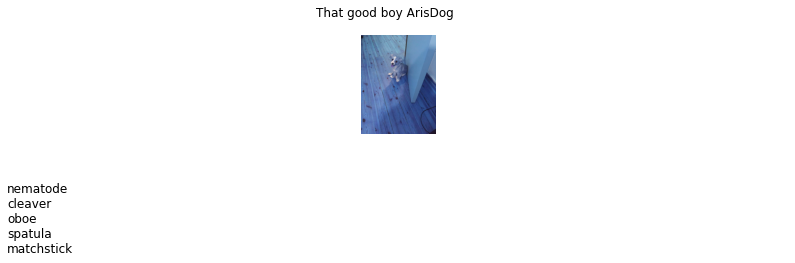

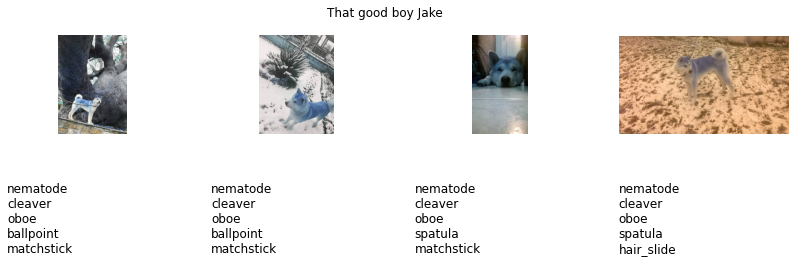

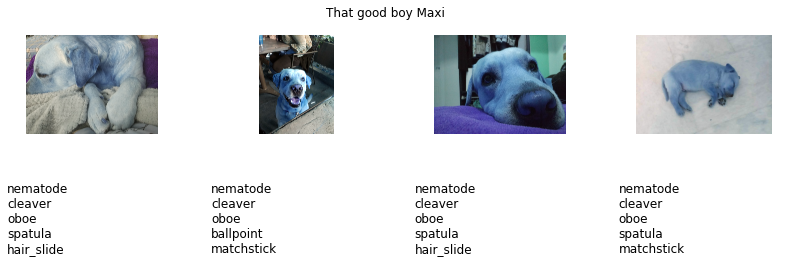

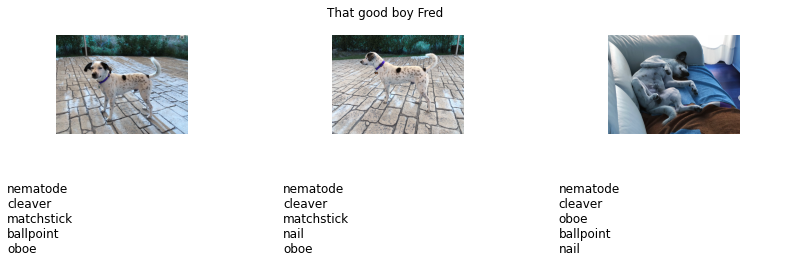

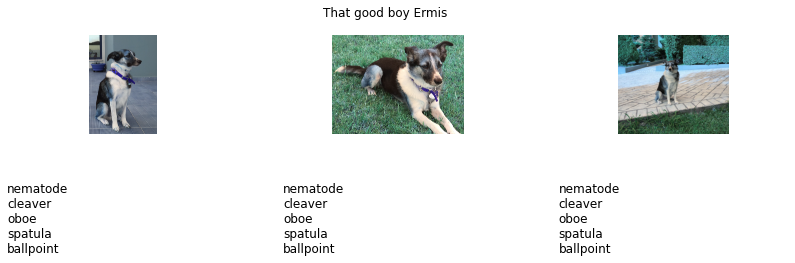

In [8]:
plot_model_outputs('ResNet50')

Is Ari's dog a space heater? That remains to be answered..

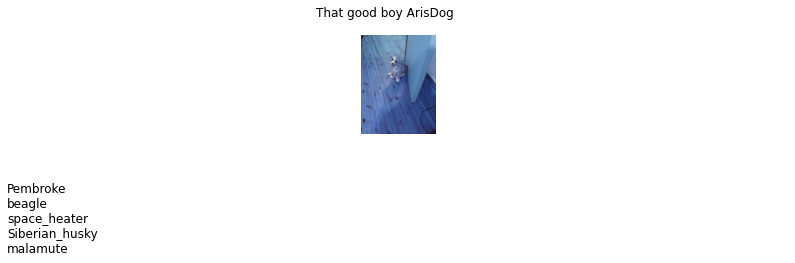

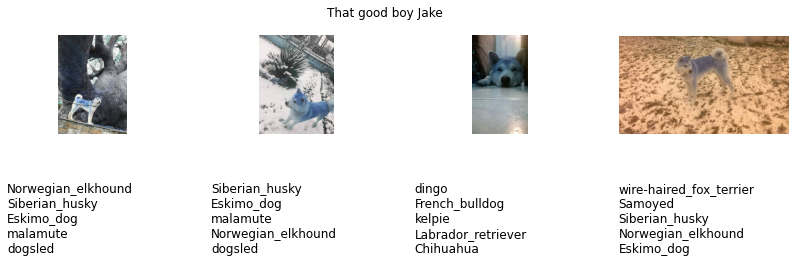

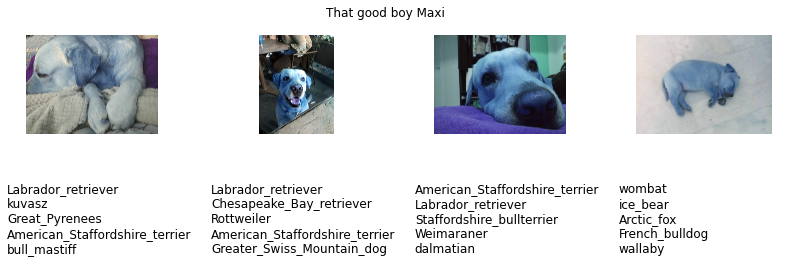

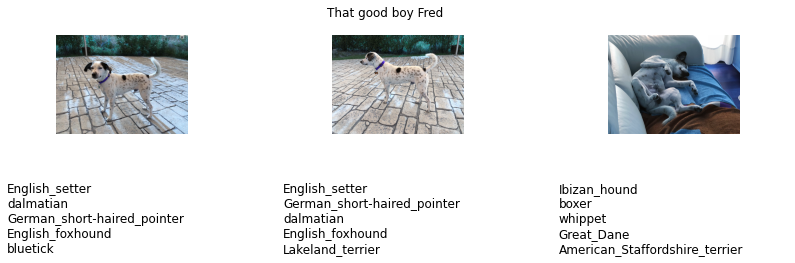

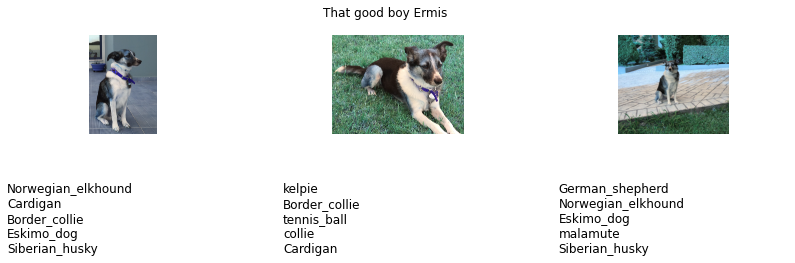

In [9]:
plot_model_outputs('InceptionResNetV2')

Baby Maxi is now an arctic fox. I couldn't agree more.

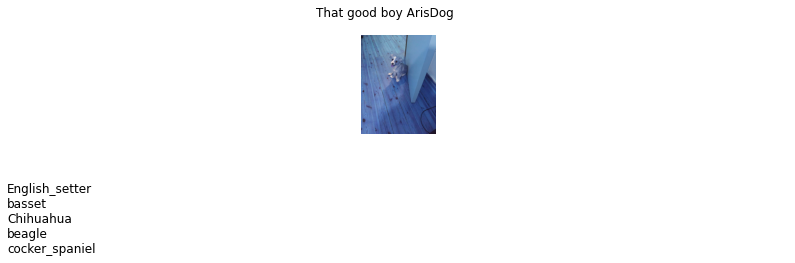

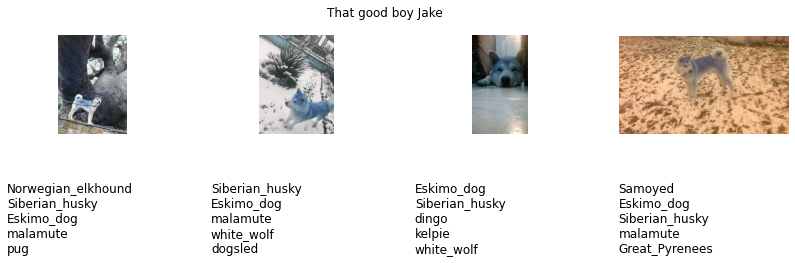

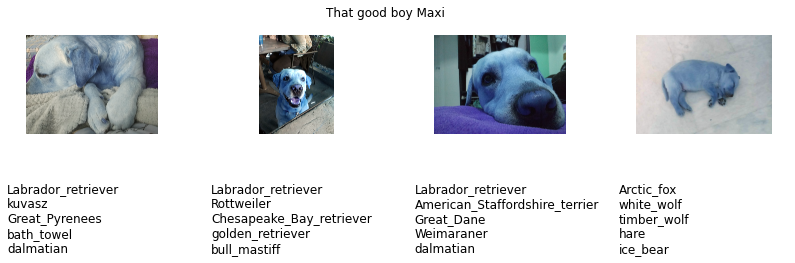

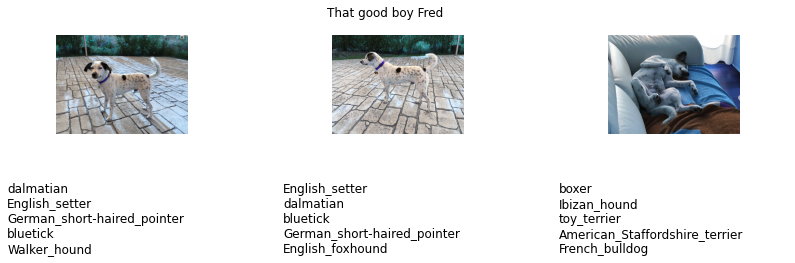

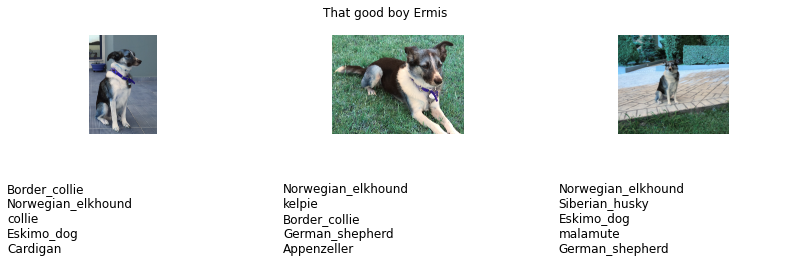

In [10]:
plot_model_outputs('NASNetLarge')

Tutorials followed:  
[OpenCV](https://www.tutorialkart.com/opencv/python/)  
[AnalyticsVidhya - Transfer Learning](https://www.analyticsvidhya.com/blog/2017/06/transfer-learning-the-art-of-fine-tuning-a-pre-trained-model/#:~:text=Simply%20put%2C%20a%20pre%2Dtrained,build%20a%20self%20learning%20car.)